In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, LabelEncoder


In [2]:
col_names=["variance of Wavelet Transformed image","skewness of Wavelet Transformed image","curtosis of Wavelet Transformed image","entropy of image","class"]
bank_data=pd.read_csv("banknote_data.csv",header=None,names=col_names)

In [3]:
bank_data.head()

,variance of Wavelet Transformed image,skewness of Wavelet Transformed image,curtosis of Wavelet Transformed image,entropy of image,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [4]:
df=pd.DataFrame(data=bank_data)

In [5]:
df

,variance of Wavelet Transformed image,skewness of Wavelet Transformed image,curtosis of Wavelet Transformed image,entropy of image,class
0,3.621600,8.66610,-2.807300,-0.446990,0
1,4.545900,8.16740,-2.458600,-1.462100,0
2,3.866000,-2.63830,1.924200,0.106450,0
3,3.456600,9.52280,-4.011200,-3.594400,0
4,0.329240,-4.45520,4.571800,-0.988800,0
5,4.368400,9.67180,-3.960600,-3.162500,0
6,3.591200,3.01290,0.728880,0.564210,0
7,2.092200,-6.81000,8.463600,-0.602160,0
8,3.203200,5.75880,-0.753450,-0.612510,0
9,1.535600,9.17720,-2.271800,-0.735350,0


In [6]:
df.describe()

,variance of Wavelet Transformed image,skewness of Wavelet Transformed image,curtosis of Wavelet Transformed image,entropy of image,class
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


In [7]:
df.isnull().sum()

variance of Wavelet Transformed image    0
skewness of Wavelet Transformed image    0
curtosis of Wavelet Transformed image    0
entropy of image                         0
class                                    0
dtype: int64

In [8]:
df.dtypes

variance of Wavelet Transformed image    float64
skewness of Wavelet Transformed image    float64
curtosis of Wavelet Transformed image    float64
entropy of image                         float64
class                                      int64
dtype: object

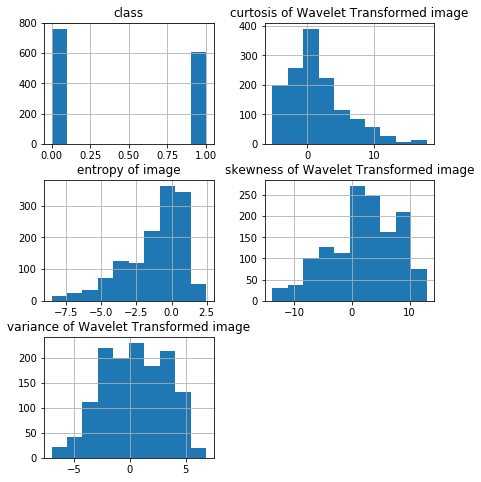

In [9]:
df.hist(figsize=(7,8))
plt.show()

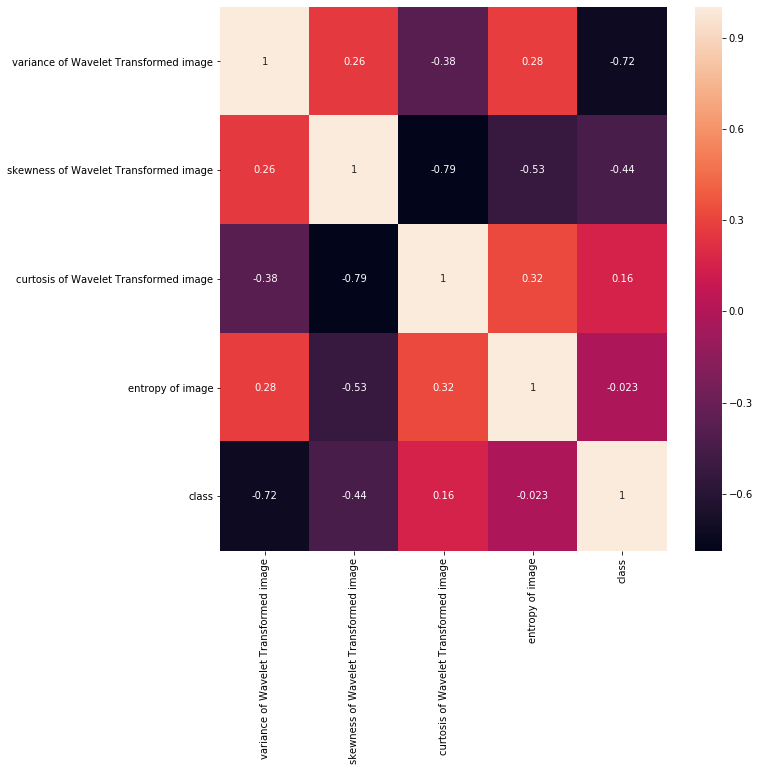

In [10]:
corr_hmap=df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr_hmap,annot=True)
plt.show()


In [11]:
x=df.iloc[:,:-1].values

In [12]:
x.shape

(1372, 4)

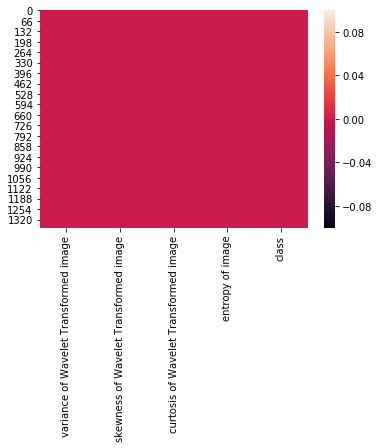

In [13]:
sns.heatmap(df.isnull())

In [14]:
from scipy.stats import zscore
z=np.abs(zscore(x))
z

array([[1.12180565, 1.14945512, 0.97597007, 0.35456135],
       [1.44706568, 1.06445293, 0.89503626, 0.12876744],
       [1.20780971, 0.77735215, 0.12221838, 0.61807317],
       ...,
       [1.47235682, 2.62164576, 3.75901744, 0.75488418],
       [1.40669251, 1.75647104, 2.552043  , 0.04315848],
       [1.04712236, 0.43982168, 0.29861555, 1.1364645 ]])

In [15]:
x_new=x[(z<3).all(axis=1)]

In [17]:
x_new.shape


(1336, 4)

In [19]:
y=df.iloc[:,-1].values.reshape(-1,1)

In [20]:
y.shape

(1372, 1)

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.22,random_state=40)

In [23]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(1070, 4)
(1070, 1)
(302, 4)
(302, 1)


In [24]:
lr=LogisticRegression()
lr.fit(x_train,y_train)
lr.score(x_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9878504672897196

In [26]:
predlr=lr.predict(x_test)
print(accuracy_score(y_test,predlr))
print(confusion_matrix(y_test,predlr))
print(classification_report(y_test,predlr))

0.9966887417218543
[[156   0]
 [  1 145]]
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       156
           1       1.00      0.99      1.00       146

    accuracy                           1.00       302
   macro avg       1.00      1.00      1.00       302
weighted avg       1.00      1.00      1.00       302



In [27]:
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(x_train,y_train)
random_forest.score(x_train,y_train)


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


1.0

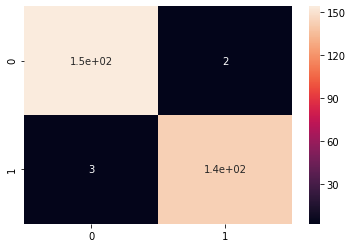

In [28]:
y_pred = random_forest.predict(x_test)

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot = True)


In [29]:
from sklearn.metrics import roc_curve, roc_auc_score,auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
print (roc_auc)

0.983315770987004
